In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# data

In [2]:
np.random.seed(42)

In [3]:
def generate_correlated_clusters(n_samples,n_features,n_clusters,correlation=0.5,random_state=None):

    np.random.seed(random_state)

    X_blobs,y_blobs = make_blobs(n_samples=n_samples,centers=n_clusters,n_features=n_features,random_state=random_state)

    centers = np.array([X_blobs[y_blobs == i].mean(axis=0) for i in range(n_clusters)])

    X,y = [],[]

    for i,center in enumerate(centers):
    
        cov_matrix = np.full((n_features,n_features),correlation)  
        np.fill_diagonal(cov_matrix,1)  

        cluster_samples = np.random.multivariate_normal(mean=center,cov=cov_matrix,size=n_samples // n_clusters)

        X.append(cluster_samples)
        y.append(np.full(n_samples // n_clusters, i)) 

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y

In [4]:
X, y = generate_correlated_clusters(n_samples=1000,n_features=5,n_clusters=2,correlation=0.1,random_state=42)
X = X + np.random.normal(scale=6,size=X.shape) 

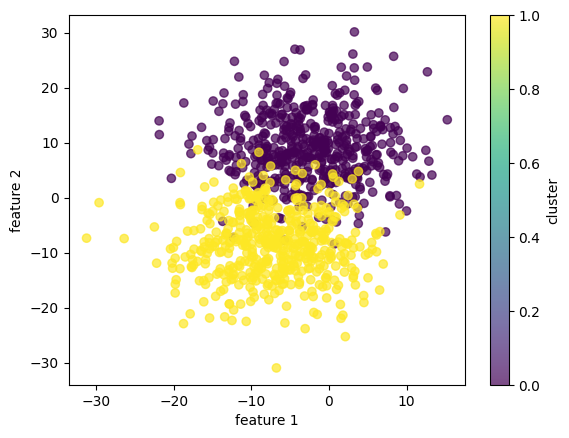

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

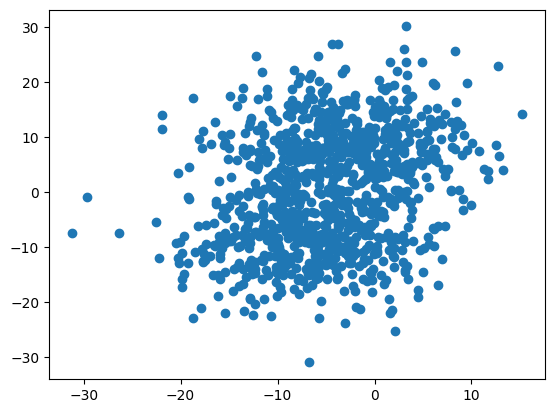

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
corr_dataset = pd.DataFrame(X) 

In [8]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [9]:
corr_dataset['target'] = y

In [10]:
corr_dataset

vab_1      vab_2      vab_3     vab_4      vab_5  target
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0
..         ...        ...        ...       ...        ...     ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1

[1000 rows x 6 columns]

In [11]:
# sns.pairplot(corr_dataset)

## correlation matrix

In [12]:
corr_dataset.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5
vab_1  1.000000  0.269924 -0.093504  0.019526 -0.273322
vab_2  0.269924  1.000000 -0.191861 -0.051951 -0.591777
vab_3 -0.093504 -0.191861  1.000000  0.006814  0.155553
vab_4  0.019526 -0.051951  0.006814  1.000000  0.030893
vab_5 -0.273322 -0.591777  0.155553  0.030893  1.000000

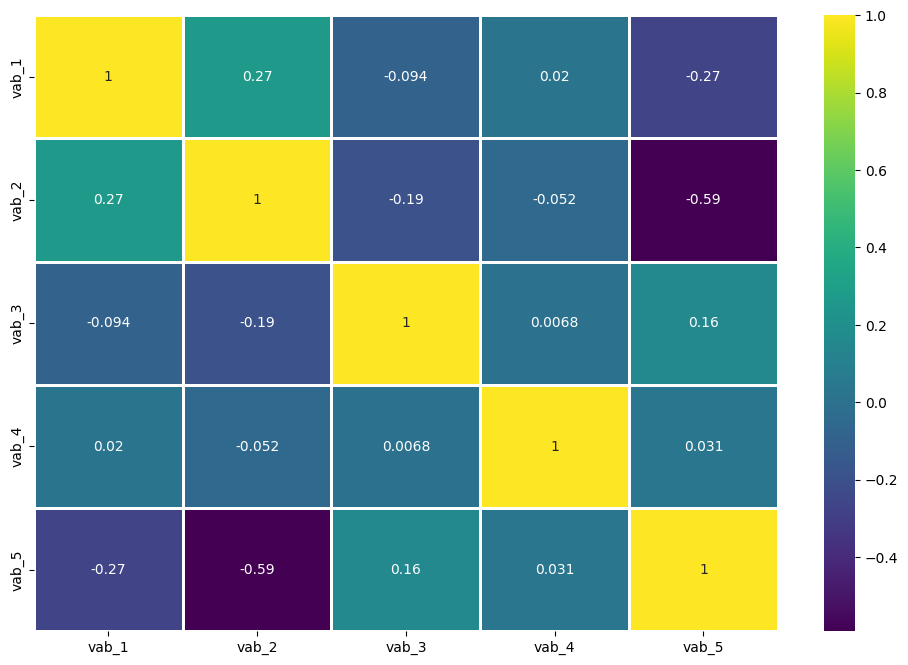

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='viridis',annot=True,linewidths=1)
plt.show()

## data standardization

In [14]:
X_values = corr_dataset.iloc[:,:-1].values

In [15]:
y_values = corr_dataset.iloc[:,-1].values

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_values = scaler.fit_transform(X_values)

In [19]:
np.mean(X_values),np.std(X_values)

(2.5579538487363605e-16, 0.9999999999999998)

In [20]:
pd.DataFrame(X_values)

0         1         2         3         4
0   -0.088733  0.603747 -2.085121 -0.400940 -0.071417
1   -0.570718  1.323234  0.326474 -0.736036 -0.763739
2    1.739750  1.118980 -0.180887  0.210936 -0.599661
3   -0.193707 -0.398274  1.751325  0.515630 -0.311533
4    0.149117  0.238032 -0.441600 -1.459720  0.870795
..        ...       ...       ...       ...       ...
995 -0.504213  0.121884 -0.840009 -0.646316 -0.534695
996 -0.494474 -1.127481  0.865730  0.329180 -0.146118
997 -0.808228 -1.131137 -1.358383 -1.294520 -0.022938
998  1.218325 -0.632004  0.899660 -1.207623  1.668411
999  0.943789 -2.092629 -0.659764  0.454315  1.449685

[1000 rows x 5 columns]

<Axes: ylabel='Density'>

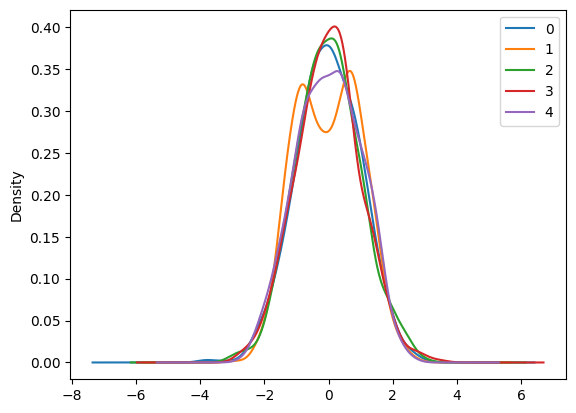

In [21]:
pd.DataFrame(X_values).plot(kind='density')

## pca 

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca_general = PCA()

In [24]:
pca_general.fit(X_values)

PCA()

In [25]:
explained_variance = pca_general.explained_variance_ratio_

In [26]:
explained_variance

array([0.37254759, 0.20150365, 0.1852589 , 0.15936787, 0.08132199])

In [27]:
eigenvalues = pca_general.explained_variance_

In [28]:
pd.DataFrame(eigenvalues)

0
0  1.864603
1  1.008527
2  0.927222
3  0.797637
4  0.407017

In [29]:
eigenvectors = pca_general.components_

### scree plot

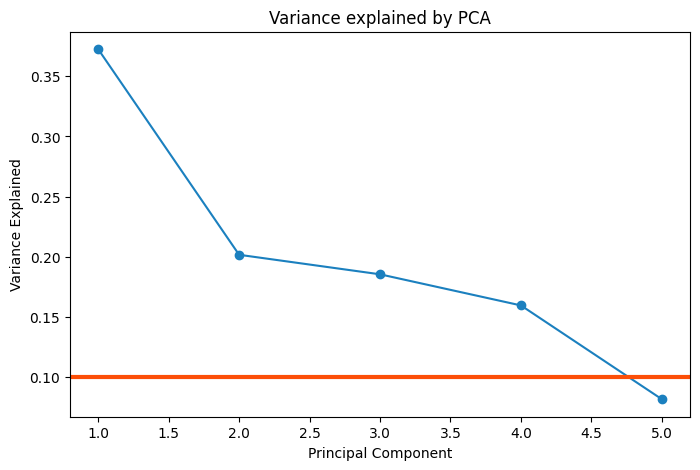

In [30]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [31]:
pca = PCA(n_components=2)

In [32]:
principal_components = pca.fit_transform(X_values)

In [33]:
pd.DataFrame(principal_components).head(8)

0         1
0  1.002926 -0.399744
1  0.979725 -0.930232
2  1.809965  0.508667
3 -0.670988  0.440524
4 -0.116227 -1.379153
5  0.221540  1.195091
6  0.597405  0.373065
7  2.776607  2.317240

In [34]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [35]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [36]:
final_df

principal component 1  principal component 2  target
0                 1.002926              -0.399744       0
1                 0.979725              -0.930232       0
2                 1.809965               0.508667       0
3                -0.670988               0.440524       0
4                -0.116227              -1.379153       0
..                     ...                    ...     ...
995               0.467155              -0.736440       1
996              -1.075233               0.254908       1
997              -0.551894              -1.346568       1
998              -1.092389              -0.873119       1
999              -1.600531               0.795200       1

[1000 rows x 3 columns]

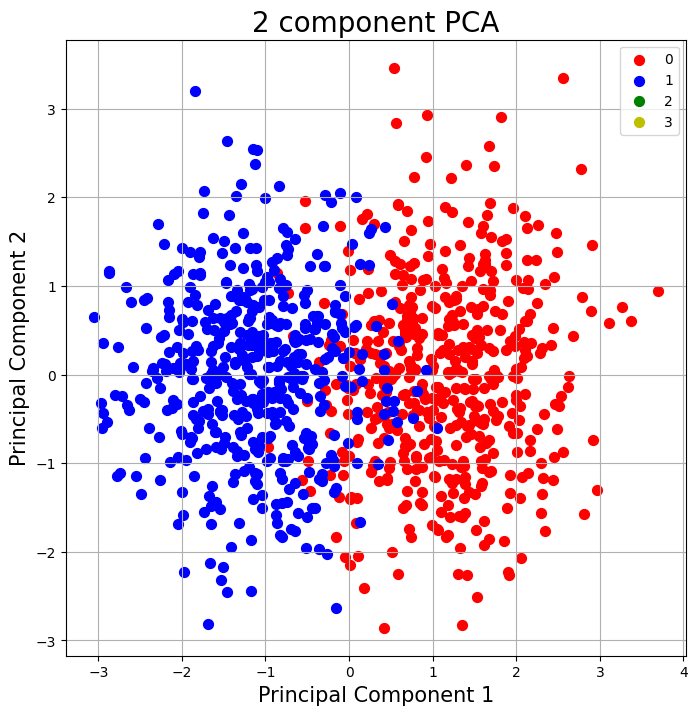

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

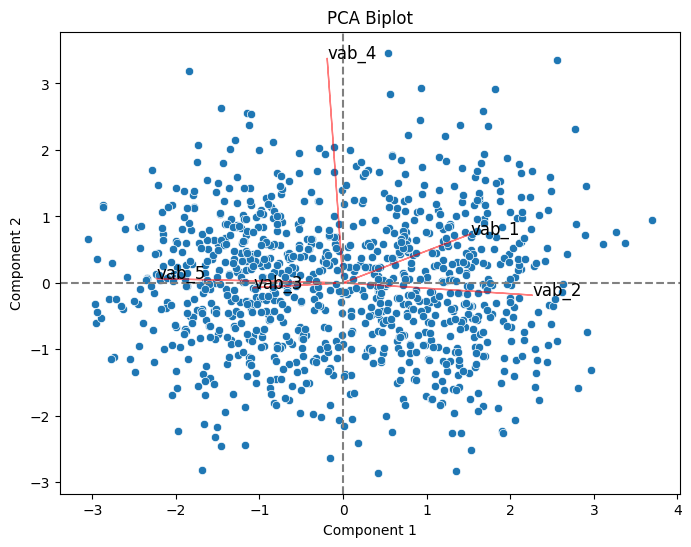

In [38]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

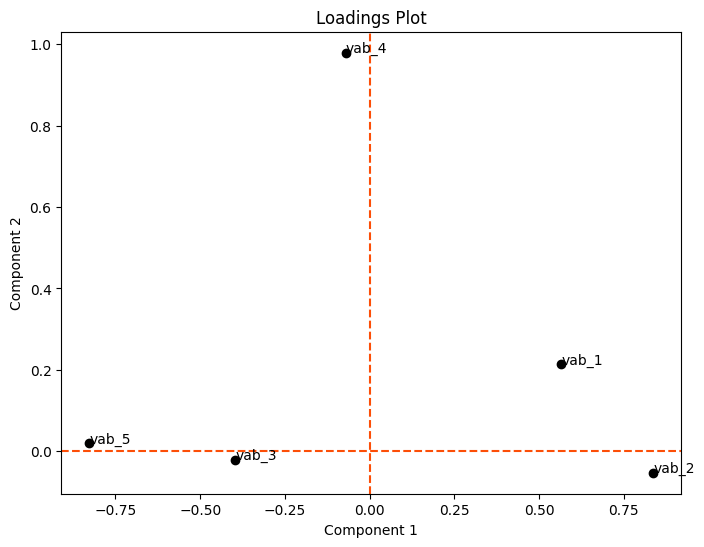

In [39]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [40]:
scores_pca = pca.transform(X_values)

In [41]:
pd.DataFrame(scores_pca).head()

0         1
0  1.002926 -0.399744
1  0.979725 -0.930232
2  1.809965  0.508667
3 -0.670988  0.440524
4 -0.116227 -1.379153

## t-SNE

In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne = TSNE(n_components=2,random_state=42)

In [44]:
X_tsne = tsne.fit_transform(X_values)

In [45]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [46]:
tsne_data

dim_1      dim_2  target
0     0.817493  13.501701       0
1    19.048475  -0.751905       0
2    39.439720  -7.665232       0
3   -14.449119  14.851144       0
4    -1.747510  -7.614829       0
..         ...        ...     ...
995   2.011341  10.705701       1
996 -20.635962   7.391303       1
997  -3.829889  10.754377       1
998 -10.568792 -11.041539       1
999 -33.712360 -15.989856       1

[1000 rows x 3 columns]

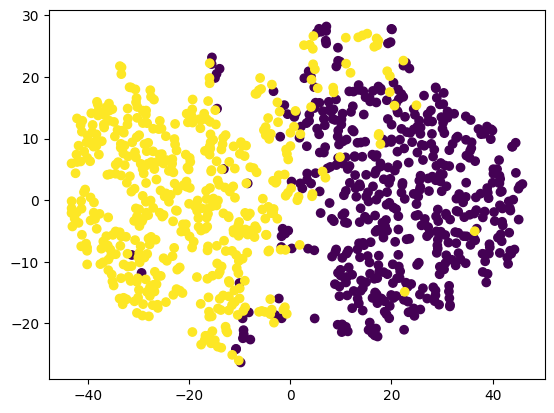

In [47]:
plt.scatter(x=tsne_data['dim_1'],y=tsne_data['dim_2'],c=tsne_data['target'])
plt.show()

In [48]:
tsne.kl_divergence_

1.2665703296661377

## UMAP

In [49]:
import umap

In [50]:
umap = umap.UMAP(random_state=42)

In [51]:
X_UMAP = umap.fit_transform(X_values)

In [52]:
UMAP_data = pd.concat([pd.DataFrame(X_UMAP,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [53]:
UMAP_data

dim_1     dim_2  target
0    3.323156  6.988904       0
1    2.810108  4.715209       0
2    0.020184  5.680420       0
3    7.598661  6.299217       0
4    6.009318  5.504544       0
..        ...       ...     ...
995  3.644997  6.676094       1
996  7.076853  7.839792       1
997  4.884387  7.840651       1
998  6.817471  6.011385       1
999  5.909836  9.694623       1

[1000 rows x 3 columns]

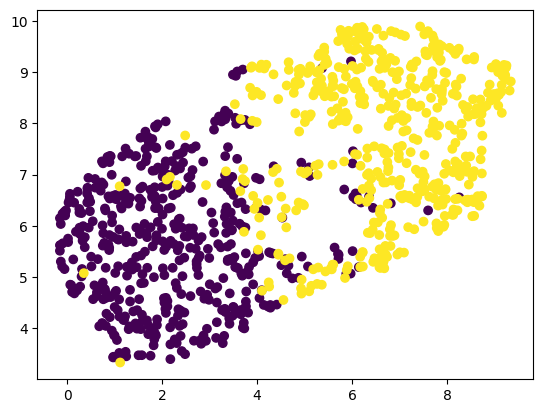

In [54]:
plt.scatter(UMAP_data['dim_1'],UMAP_data['dim_2'],c=UMAP_data['target'])
plt.show()

## k-means 

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [57]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [58]:
df_kmeans = corr_dataset.copy()

In [59]:
df_kmeans['k_means'] = kmeans.labels_

In [60]:
df_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  k_means
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0        0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0        0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0        0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0        1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0        1
..         ...        ...        ...       ...        ...     ...      ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1        0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1        1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1        1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1        1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1        1

[1000 rows x 7 columns]

In [61]:
from scipy.optimize import linear_sum_assignment

y_true = df_kmeans['target'].values  
y_kmeans = df_kmeans['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_kmeans['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_kmeans['k_means'] == y_true))

accuracy before: 0.943
accuracy after: 0.943


In [62]:
df_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  k_means
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0        0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0        0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0        0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0        1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0        1
..         ...        ...        ...       ...        ...     ...      ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1        0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1        1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1        1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1        1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1        1

[1000 rows x 7 columns]

In [63]:
print(np.unique(df_kmeans['target']))

[0 1]


In [64]:
print(np.unique(kmeans.labels_))

[0 1]


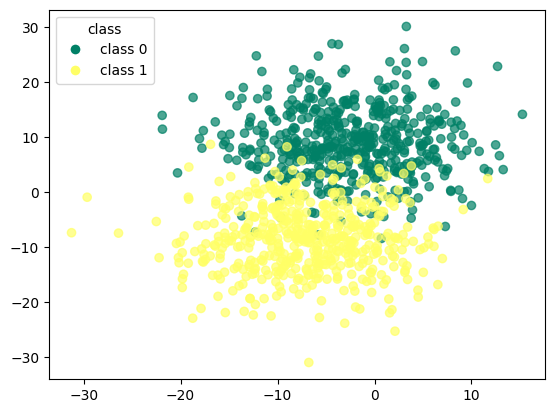

In [65]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

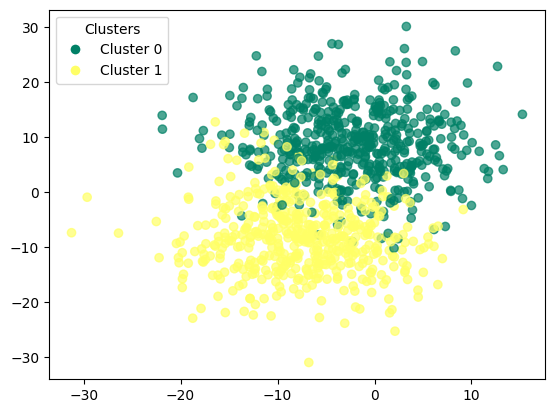

In [66]:
scatter = plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], 
                      c=df_kmeans['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_kmeans['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [67]:
kmeans.cluster_centers_

array([[ 0.39967579,  0.78545712, -0.28170689, -0.04231577, -0.71869482],
       [-0.40288603, -0.79176602,  0.2839696 ,  0.04265566,  0.72446747]])

In [68]:
print(confusion_matrix(df_kmeans['target'],df_kmeans['k_means']))

[[473  27]
 [ 30 470]]


In [69]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       500
           1       0.95      0.94      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



### k-means with pca

In [70]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [71]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [72]:
df_pca_kmeans = corr_dataset.copy()

In [73]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [74]:
df_pca_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  kmeans_pca
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0           0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0           0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0           0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0           1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0           1
..         ...        ...        ...       ...        ...     ...         ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1           0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1           1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1           1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1           1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1           1

[1000 rows x 7 columns]

In [75]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.928
accuracy after: 0.928


In [76]:
df_pca_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  kmeans_pca
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0           0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0           0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0           0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0           1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0           1
..         ...        ...        ...       ...        ...     ...         ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1           0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1           1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1           1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1           1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1           1

[1000 rows x 7 columns]

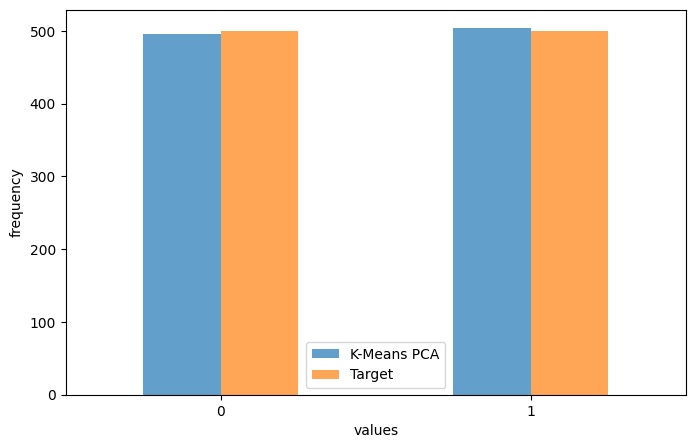

In [77]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [78]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[462  38]
 [ 34 466]]


In [79]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       500
           1       0.92      0.93      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



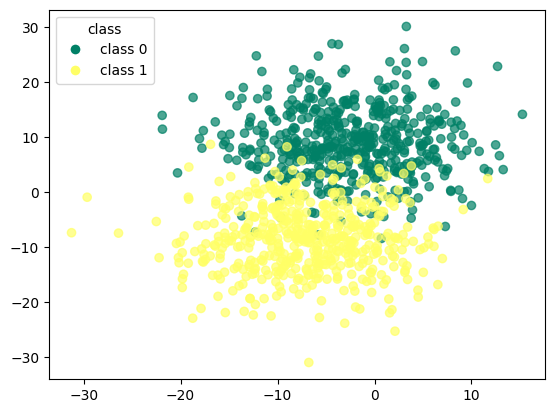

In [80]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

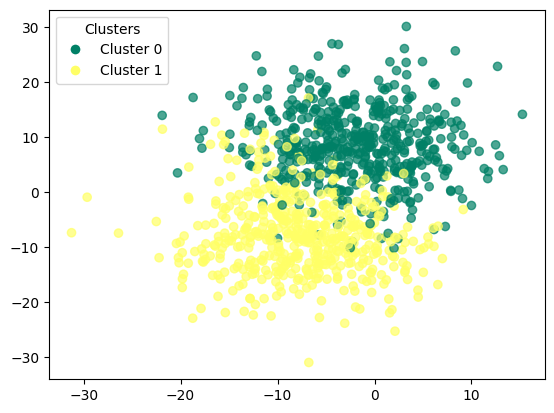

In [81]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

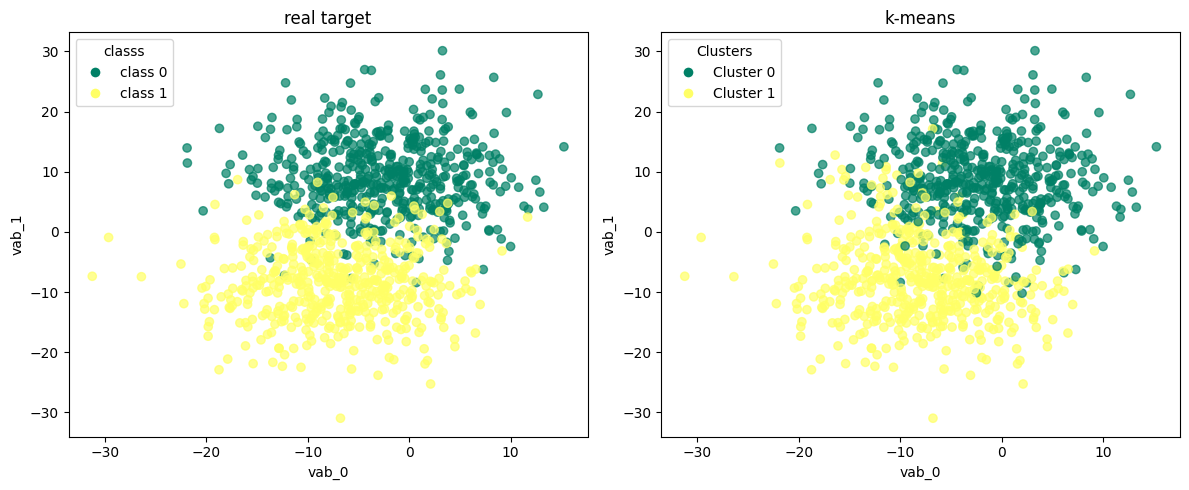

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

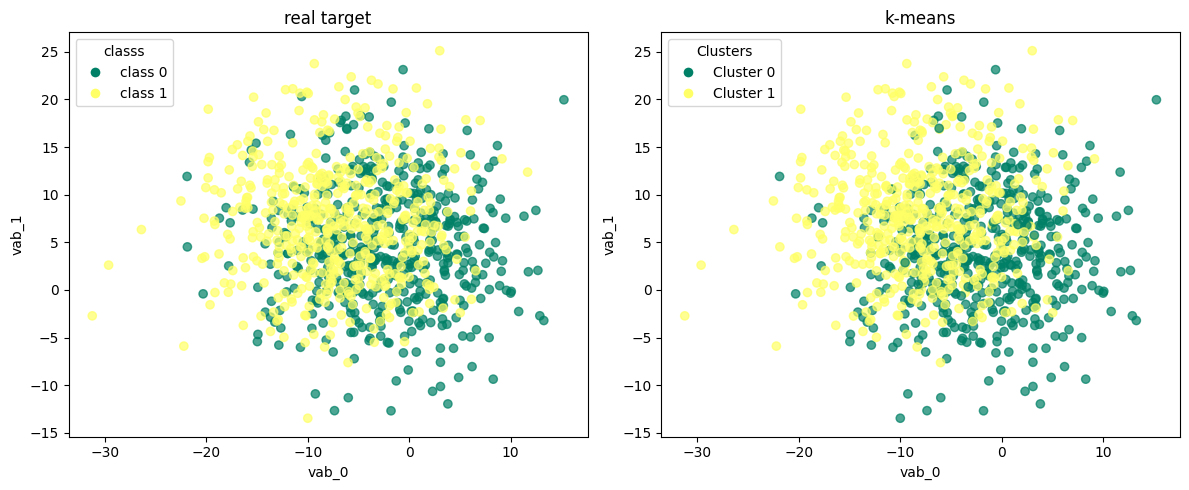

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

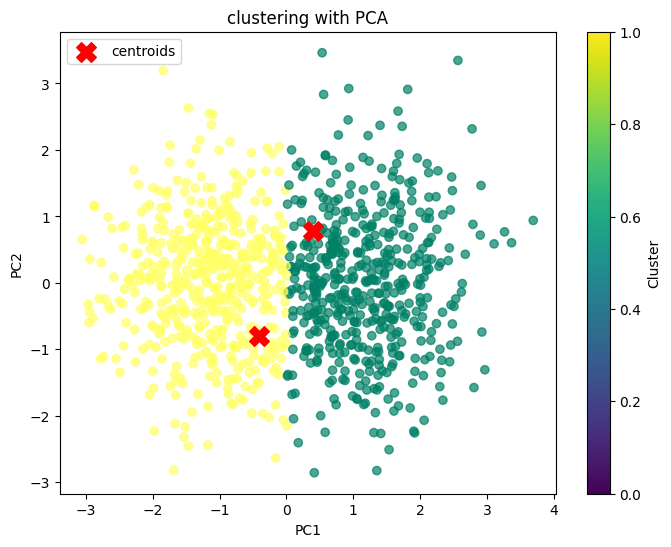

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

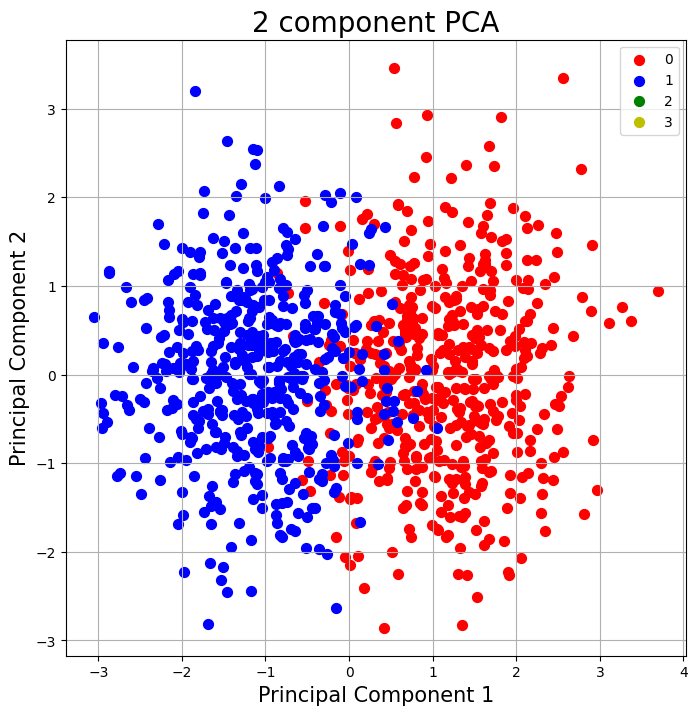

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### k-means with t-SNE

In [86]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [87]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2, random_state=42)

In [88]:
df_tsne_kmeans = corr_dataset.copy()

In [89]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [90]:
df_tsne_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  kmeans_tsne
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0            0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0            0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0            0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0            1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0            1
..         ...        ...        ...       ...        ...     ...          ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1            0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1            1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1            1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1            1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1            1

[1000 rows x 7 columns]

In [91]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.92
accuracy after: 0.92


In [92]:
df_tsne_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  kmeans_tsne
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0            0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0            0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0            0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0            1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0            1
..         ...        ...        ...       ...        ...     ...          ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1            0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1            1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1            1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1            1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1            1

[1000 rows x 7 columns]

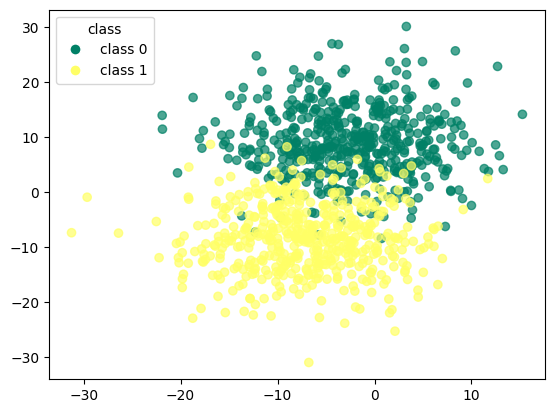

In [93]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

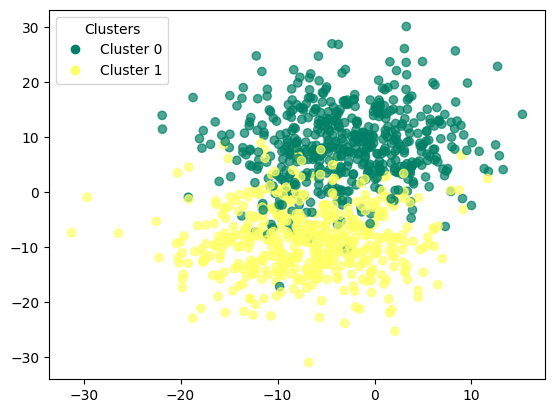

In [94]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

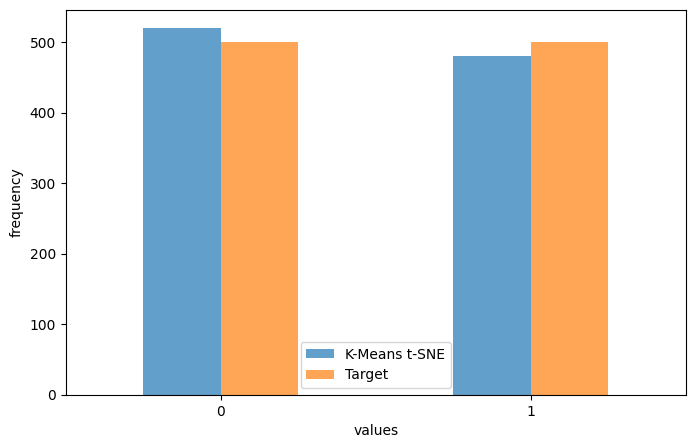

In [95]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [96]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[470  30]
 [ 50 450]]


In [97]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       500
           1       0.94      0.90      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



### k-means with UMAP

In [98]:
kmeans_UMAP = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [99]:
kmeans_UMAP.fit(X_UMAP)

KMeans(n_clusters=2, random_state=42)

In [100]:
df_UMAP_kmeans = corr_dataset.copy()

In [101]:
df_UMAP_kmeans['kmeans_UMAP'] = kmeans_UMAP.labels_

In [102]:
df_UMAP_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  kmeans_UMAP
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0            0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0            0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0            0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0            1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0            1
..         ...        ...        ...       ...        ...     ...          ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1            0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1            1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1            1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1            1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1            1

[1000 rows x 7 columns]

In [103]:
y_true = df_UMAP_kmeans['target'].values  
y_kmeans = df_UMAP_kmeans['kmeans_UMAP'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_UMAP_kmeans['kmeans_UMAP'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_UMAP_kmeans['kmeans_UMAP'] == y_true))

accuracy before: 0.926
accuracy after: 0.926


In [104]:
df_UMAP_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  kmeans_UMAP
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0            0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0            0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0            0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0            1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0            1
..         ...        ...        ...       ...        ...     ...          ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1            0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1            1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1            1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1            1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1            1

[1000 rows x 7 columns]

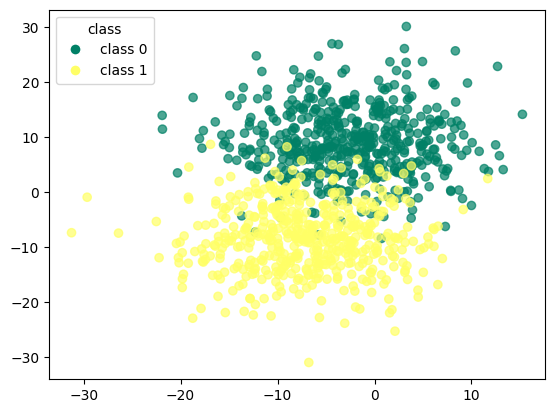

In [105]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_UMAP_kmeans.iloc[:, 0], df_UMAP_kmeans.iloc[:, 1], 
                      c=df_UMAP_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_UMAP_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

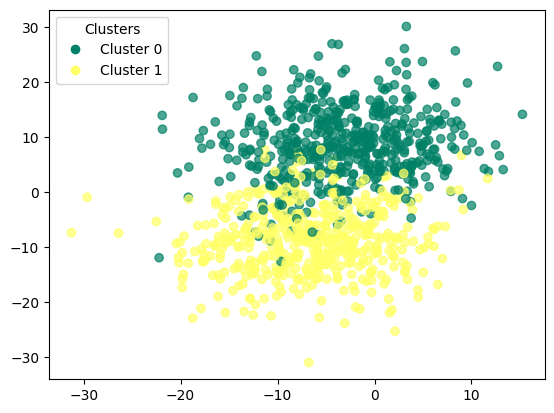

In [106]:
scatter = plt.scatter(df_UMAP_kmeans.iloc[:, 0], df_UMAP_kmeans.iloc[:, 1], 
                      c=df_UMAP_kmeans['kmeans_UMAP'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_UMAP_kmeans['kmeans_UMAP'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

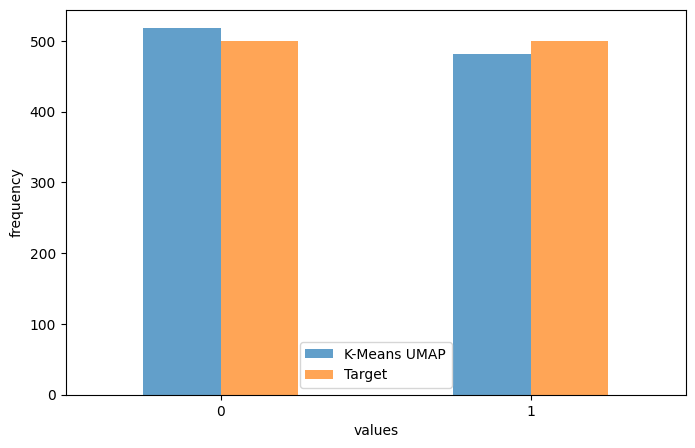

In [107]:
counts_kmeans = df_UMAP_kmeans['kmeans_UMAP'].value_counts().sort_index()
counts_target = df_UMAP_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means UMAP': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means UMAP", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [108]:
print(confusion_matrix(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP']))

[[472  28]
 [ 46 454]]


In [109]:
print(classification_report(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       500
           1       0.94      0.91      0.92       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



## trimmed k-means

In [110]:
def trimmed_clustering(X,n_clusters,trim_fraction=0.1):

    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    distances = np.min(kmeans.transform(X),axis=1)
    
    trim_threshold = np.percentile(distances,100 * (1 - trim_fraction))
    trimmed_X = X[distances < trim_threshold]
    trimmed_indices = np.where(distances < trim_threshold)[0]
    trimmed_kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(trimmed_X)
    
    return trimmed_kmeans,trimmed_indices

In [111]:
trimmed_kmeans,trimmmed_indces = trimmed_clustering(X_values,n_clusters=2,trim_fraction=0.1)

In [112]:
trimmed_kmeans

KMeans(n_clusters=2, random_state=42)

In [113]:
df_trim_kmeans = corr_dataset.copy()

In [114]:
df_trim_kmeans = df_trim_kmeans.iloc[trimmmed_indces]  

In [115]:
df_trim_kmeans['trim_kmeans'] = trimmed_kmeans.labels_

In [116]:
df_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  trim_kmeans
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0            0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0            0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0            0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0            1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0            1
..         ...        ...        ...       ...        ...     ...          ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1            0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1            1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1            1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1            1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1            1

[900 rows x 7 columns]

In [117]:
from scipy.optimize import linear_sum_assignment

y_true = df_trim_kmeans['target'].values  
y_kmeans = df_trim_kmeans['trim_kmeans'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_trim_kmeans['trim_kmeans'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_trim_kmeans['trim_kmeans'] == y_true))

accuracy before: 0.9466666666666667
accuracy after: 0.9466666666666667


In [118]:
df_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  trim_kmeans
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0            0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0            0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0            0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0            1
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0            1
..         ...        ...        ...       ...        ...     ...          ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1            0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1            1
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1            1
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1            1
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1            1

[900 rows x 7 columns]

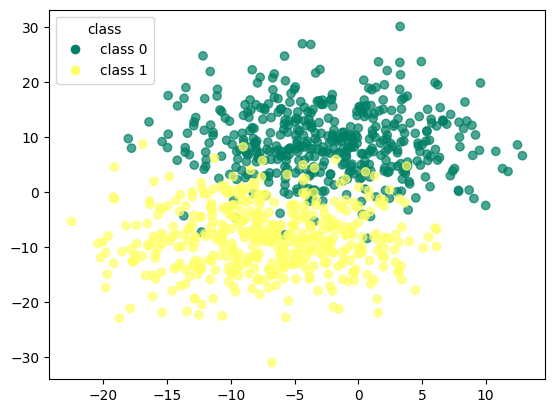

In [119]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

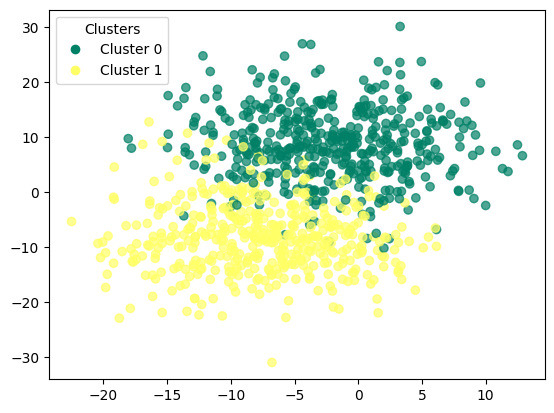

In [120]:
scatter = plt.scatter(df_trim_kmeans.iloc[:, 0], df_trim_kmeans.iloc[:, 1], 
                      c=df_trim_kmeans['trim_kmeans'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_trim_kmeans['trim_kmeans'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [121]:
print(confusion_matrix(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

[[426  19]
 [ 29 426]]


In [122]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       445
           1       0.96      0.94      0.95       455

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



### trimmed k-means with pca

In [123]:
trim_kmeans_pca,trimmmed_indices = trimmed_clustering(scores_pca,n_clusters=2,trim_fraction=0.1)

In [124]:
trim_kmeans_pca

KMeans(n_clusters=2, random_state=42)

In [125]:
df_pca_trim_kmeans = corr_dataset.copy()

In [126]:
df_pca_trim_kmeans = df_pca_trim_kmeans.iloc[trimmmed_indces]  

In [127]:
df_pca_trim_kmeans["trim_kmeans_pca"] = trim_kmeans_pca.labels_

In [128]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  \
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0   
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0   
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0   
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0   
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0   
..         ...        ...        ...       ...        ...     ...   
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1   
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1   
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1   
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1   
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1   

     trim_kmeans_pca  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1  
..               ...  
995                0  
996                1  
997                1  
998                1  
999                1  

[900 rows x 7 columns]

In [129]:
y_true = df_pca_trim_kmeans['target'].values  
y_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_trim_kmeans['trim_kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_trim_kmeans['trim_kmeans_pca'] == y_true))

accuracy before: 0.93
accuracy after: 0.93


In [130]:
df_pca_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  \
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0   
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0   
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0   
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0   
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0   
..         ...        ...        ...       ...        ...     ...   
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1   
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1   
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1   
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1   
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1   

     trim_kmeans_pca  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1  
..               ...  
995                0  
996                1  
997                1  
998                1  
999                1  

[900 rows x 7 columns]

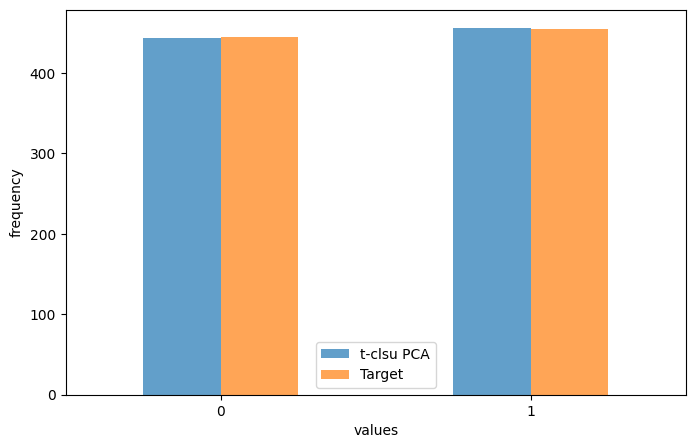

In [131]:
counts_kmeans = df_pca_trim_kmeans['trim_kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'t-clust PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["t-clsu PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [132]:
print(confusion_matrix(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

[[413  32]
 [ 31 424]]


In [133]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       445
           1       0.93      0.93      0.93       455

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



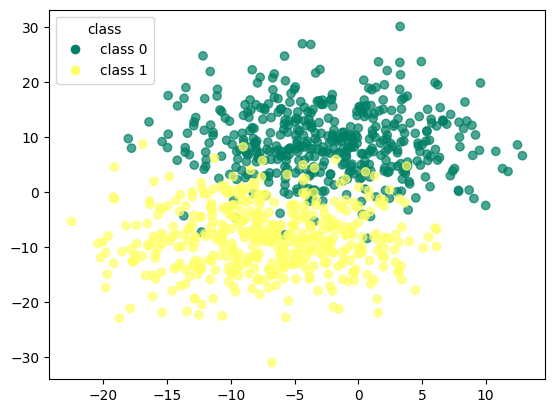

In [134]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                      c=df_pca_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

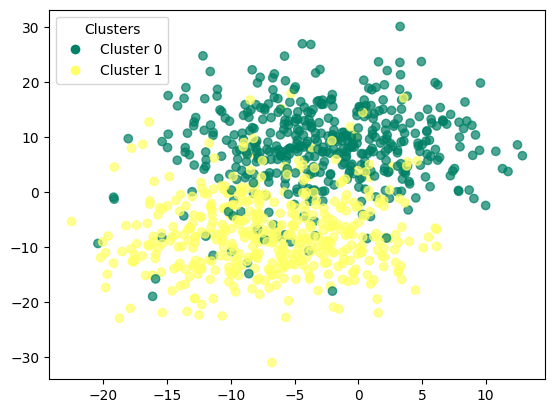

In [135]:
scatter = plt.scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                      c=df_pca_trim_kmeans['trim_kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_trim_kmeans['trim_kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

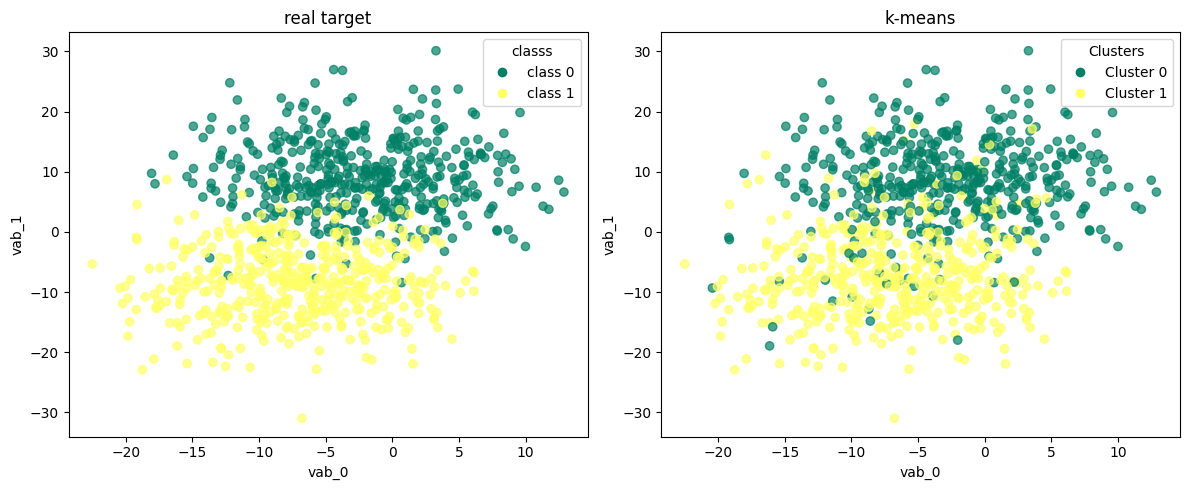

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                           c=df_pca_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_trim_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 1], 
                           c=df_pca_trim_kmeans['trim_kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_trim_kmeans['trim_kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

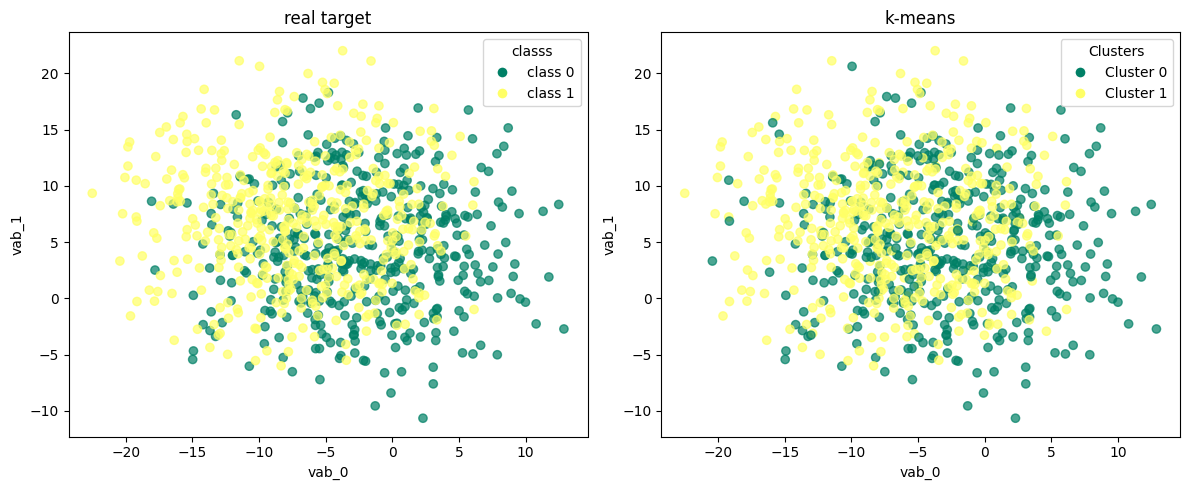

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 2], 
                           c=df_pca_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_trim_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_trim_kmeans.iloc[:, 0], df_pca_trim_kmeans.iloc[:, 2], 
                           c=df_pca_trim_kmeans['trim_kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_trim_kmeans['trim_kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

### trimmed k-means with t-SNE

In [138]:
trim_kmeans_tsne,trimmmed_indices = trimmed_clustering(X_tsne,n_clusters=2,trim_fraction=0.1)

In [139]:
trim_kmeans_tsne

KMeans(n_clusters=2, random_state=42)

In [140]:
df_tsne_trim_kmeans = corr_dataset.copy()

In [141]:
df_tsne_trim_kmeans = df_tsne_trim_kmeans.iloc[trimmmed_indces]  

In [142]:
df_tsne_trim_kmeans['trim_kmeans_tsne'] = trim_kmeans_tsne.labels_

In [143]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  \
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0   
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0   
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0   
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0   
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0   
..         ...        ...        ...       ...        ...     ...   
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1   
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1   
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1   
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1   
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1   

     trim_kmeans_tsne  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
995                 0  
996                 1  
997                 1  
998                 1  
999                 1  

[900 rows x 7 columns]

In [144]:
y_true = df_tsne_trim_kmeans['target'].values  
y_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_trim_kmeans['trim_kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_trim_kmeans['trim_kmeans_tsne'] == y_true))

accuracy before: 0.94
accuracy after: 0.94


In [145]:
df_tsne_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  \
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0   
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0   
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0   
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0   
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0   
..         ...        ...        ...       ...        ...     ...   
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1   
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1   
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1   
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1   
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1   

     trim_kmeans_tsne  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
995                 0  
996                 1  
997                 1  
998                 1  
999                 1  

[900 rows x 7 columns]

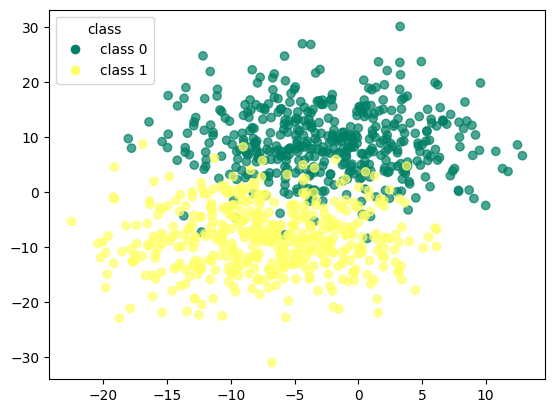

In [146]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

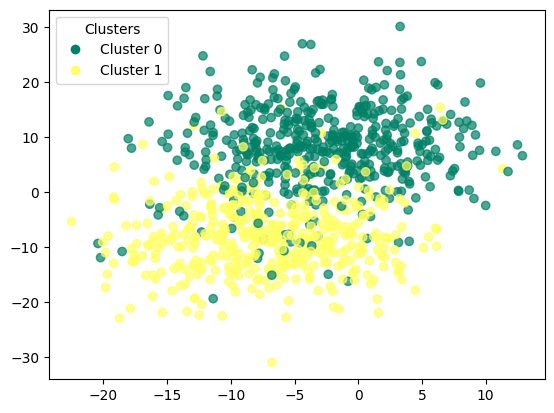

In [147]:
scatter = plt.scatter(df_tsne_trim_kmeans.iloc[:, 0], df_tsne_trim_kmeans.iloc[:, 1], 
                      c=df_tsne_trim_kmeans['trim_kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_trim_kmeans['trim_kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

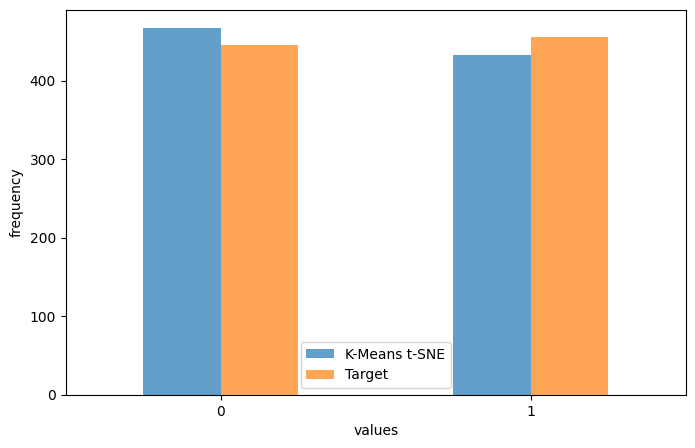

In [148]:
counts_kmeans = df_tsne_trim_kmeans['trim_kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [149]:
print(confusion_matrix(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne']))

[[429  16]
 [ 38 417]]


In [150]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       445
           1       0.96      0.92      0.94       455

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



### trimmed k-means with UMAP

In [151]:
trim_kmeans_UMAP,trimmmed_indices = trimmed_clustering(X_UMAP,n_clusters=2,trim_fraction=0.1)

In [152]:
trim_kmeans_UMAP

KMeans(n_clusters=2, random_state=42)

In [153]:
df_UMAP_trim_kmeans = corr_dataset.copy()

In [154]:
df_UMAP_trim_kmeans = df_UMAP_trim_kmeans.iloc[trimmmed_indices]

In [155]:
df_UMAP_trim_kmeans['trim_kmeans_UMAP'] = trim_kmeans_UMAP.labels_

In [156]:
df_UMAP_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  \
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0   
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0   
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0   
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0   
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0   
..         ...        ...        ...       ...        ...     ...   
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1   
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1   
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1   
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1   
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1   

     trim_kmeans_UMAP  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
995                 0  
996                 1  
997                 1  
998                 1  
999                 1  

[900 rows x 7 columns]

In [157]:
y_true = df_UMAP_trim_kmeans['target'].values  
y_kmeans = df_UMAP_trim_kmeans['trim_kmeans_UMAP'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_UMAP_trim_kmeans['trim_kmeans_UMAP'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_UMAP_trim_kmeans['trim_kmeans_UMAP'] == y_true))

accuracy before: 0.9455555555555556
accuracy after: 0.9455555555555556


In [158]:
df_UMAP_trim_kmeans

vab_1      vab_2      vab_3     vab_4      vab_5  target  \
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0   
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0   
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0   
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0   
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0   
..         ...        ...        ...       ...        ...     ...   
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1   
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1   
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1   
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1   
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1   

     trim_kmeans_UMAP  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
995                 0  
996                 1  
997                 1  
998                 1  
999                 1  

[900 rows x 7 columns]

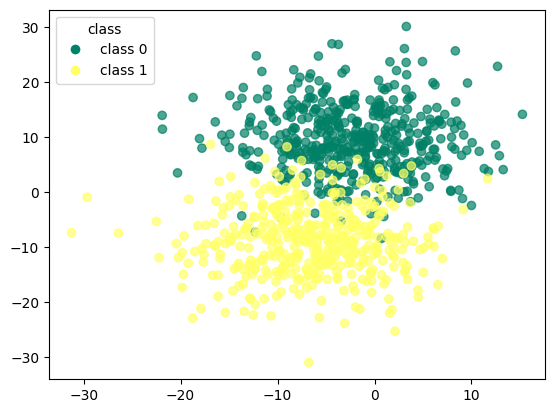

In [159]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_UMAP_trim_kmeans.iloc[:, 0], df_UMAP_trim_kmeans.iloc[:, 1], 
                      c=df_UMAP_trim_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_UMAP_trim_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

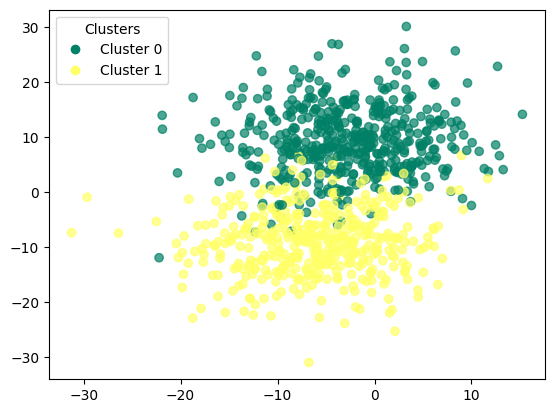

In [160]:
scatter = plt.scatter(df_UMAP_trim_kmeans.iloc[:, 0], df_UMAP_trim_kmeans.iloc[:, 1], 
                      c=df_UMAP_trim_kmeans['trim_kmeans_UMAP'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_UMAP_trim_kmeans['trim_kmeans_UMAP'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

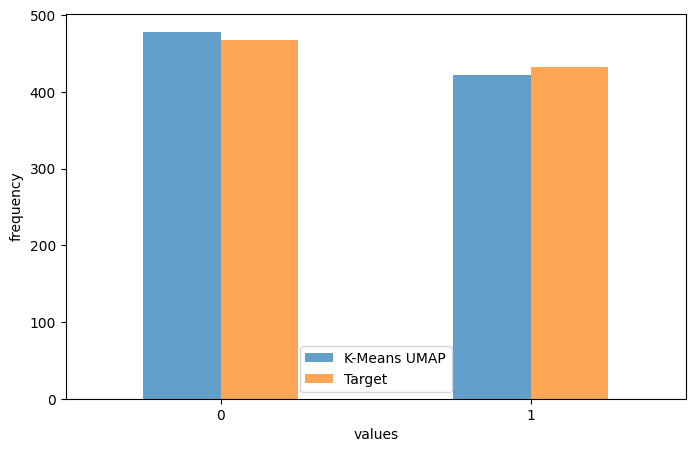

In [161]:
counts_kmeans = df_UMAP_trim_kmeans['trim_kmeans_UMAP'].value_counts().sort_index()
counts_target = df_UMAP_trim_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means UMAP': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means UMAP", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [162]:
print(confusion_matrix(df_UMAP_trim_kmeans['target'],df_UMAP_trim_kmeans['trim_kmeans_UMAP']))

[[448  19]
 [ 30 403]]


In [163]:
print(classification_report(df_UMAP_trim_kmeans['target'],df_UMAP_trim_kmeans['trim_kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       467
           1       0.95      0.93      0.94       433

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



## dbscan

In [199]:
from sklearn.cluster import DBSCAN

In [200]:
from sklearn.neighbors import NearestNeighbors
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

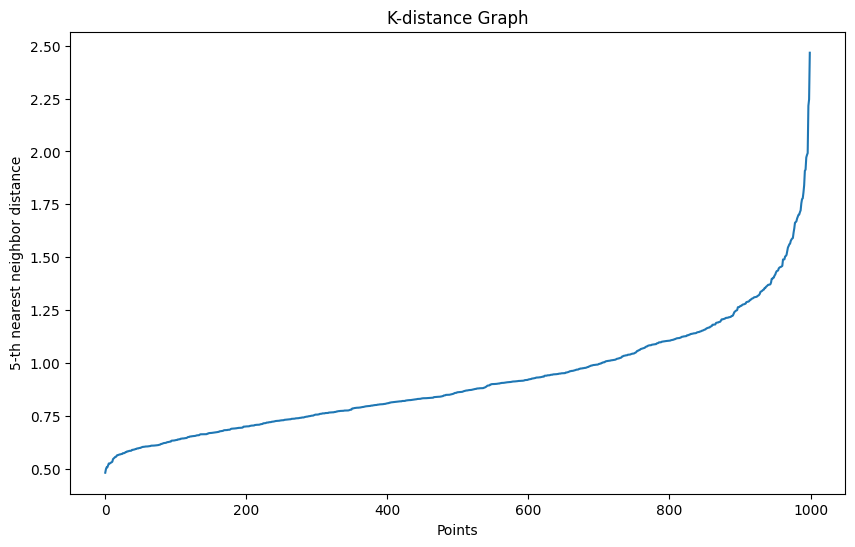

In [201]:
plot_k_distance_graph(X_values,k=5)

In [202]:
dbscan = DBSCAN(eps=1.50,min_samples=10)

In [203]:
dbscan.fit(X_values)

DBSCAN(eps=1.5, min_samples=10)

In [204]:
df_dbscan = corr_dataset.copy()

In [205]:
df_dbscan['dbscan'] = dbscan.labels_

In [207]:
df_dbscan

vab_1      vab_2      vab_3     vab_4      vab_5  target  dbscan
0    -5.423772   6.851494  -7.213610 -0.922923  -1.821568       0       0
1    -8.682548  14.535371   7.922797 -2.965594  -7.468711       0       0
2     6.938908  12.354005   4.738340  2.806942  -6.130362       0       0
3    -6.133518  -3.849754  16.865893  4.664295  -3.780148       0       0
4    -3.815628   2.945780   3.101972 -7.377023   5.863886       0       0
..         ...        ...        ...       ...        ...     ...     ...
995  -8.232900   1.705356   0.601353 -2.418682  -5.600446       1       0
996  -8.167051 -11.637427  11.307442  3.527732  -2.430888       1       0
997 -10.288397 -11.676477  -2.652230 -6.369998  -1.426134       1       0
998   3.413463  -6.345902  11.520406 -5.840291  12.369903       1       0
999   1.557278 -21.944878   1.732662  4.290529  10.585788       1       0

[1000 rows x 7 columns]

# overall results k-means

In [164]:
print(classification_report(df_kmeans['target'],df_kmeans['k_means']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       500
           1       0.95      0.94      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [165]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       500
           1       0.92      0.93      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [166]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       500
           1       0.94      0.90      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [167]:
print(classification_report(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       500
           1       0.94      0.91      0.92       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



# overall results trimmed k-means

In [168]:
print(classification_report(df_trim_kmeans['target'],df_trim_kmeans['trim_kmeans']))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       445
           1       0.96      0.94      0.95       455

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [169]:
print(classification_report(df_pca_trim_kmeans['target'],df_pca_trim_kmeans['trim_kmeans_pca']))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       445
           1       0.93      0.93      0.93       455

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [170]:
print(classification_report(df_tsne_trim_kmeans['target'],df_tsne_trim_kmeans['trim_kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       445
           1       0.96      0.92      0.94       455

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [171]:
print(classification_report(df_UMAP_trim_kmeans['target'],df_UMAP_trim_kmeans['trim_kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       467
           1       0.95      0.93      0.94       433

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

